In [18]:
pip install seaborn

     |████████████████████████████████| 225kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 3.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows=10
pd.options.display.max_columns=6

data = pd.read_csv("olympics.csv", sep="\t")
data

,City,Year,Sport,...,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,...,Gold,Hungary,HUN
1,Athens,1896,Aquatics,...,Silver,Austria,AUT
2,Athens,1896,Aquatics,...,Bronze,Greece,GRE
3,Athens,1896,Aquatics,...,Gold,Greece,GRE
4,Athens,1896,Aquatics,...,Silver,Greece,GRE
...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,...,Silver,Germany,GER
29212,Beijing,2008,Wrestling,...,Bronze,Lithuania,LTU
29213,Beijing,2008,Wrestling,...,Bronze,Armenia,ARM
29214,Beijing,2008,Wrestling,...,Gold,Cuba,CUB


In [3]:
data['Country'].value_counts().head(30)

United States     4335
Soviet Union      2049
United Kingdom    1594
France            1314
Italy             1228
                  ... 
Spain              377
Switzerland        376
Brazil             372
Bulgaria           331
Czechoslovakia     329
Name: Country, Length: 30, dtype: int64

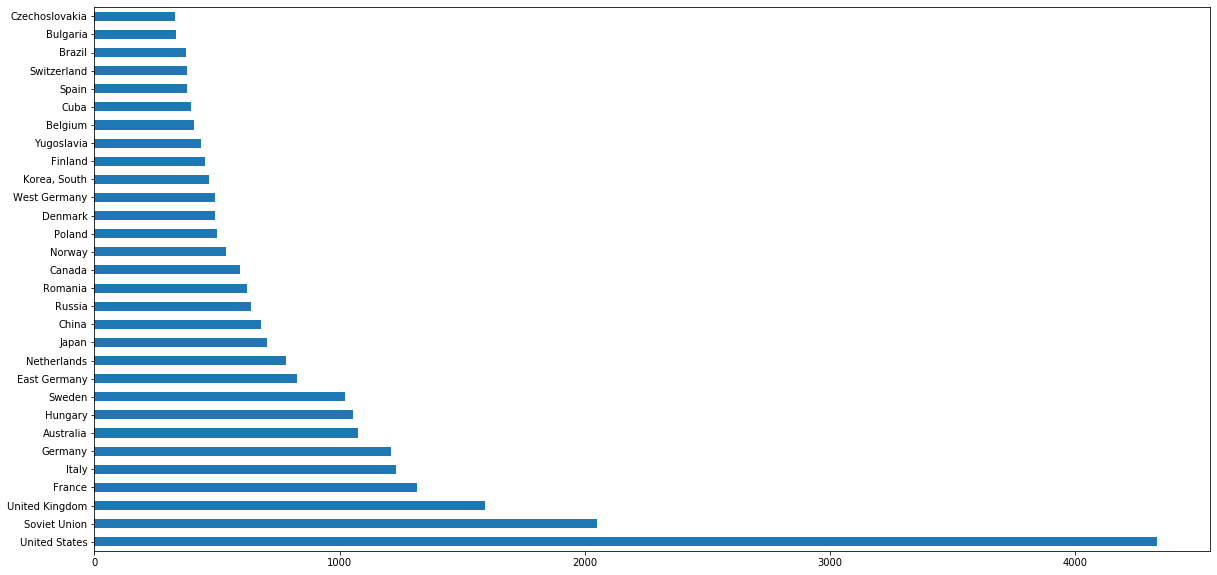

In [4]:
data['Country'].value_counts().head(30).plot(kind='barh', figsize = (20,10))

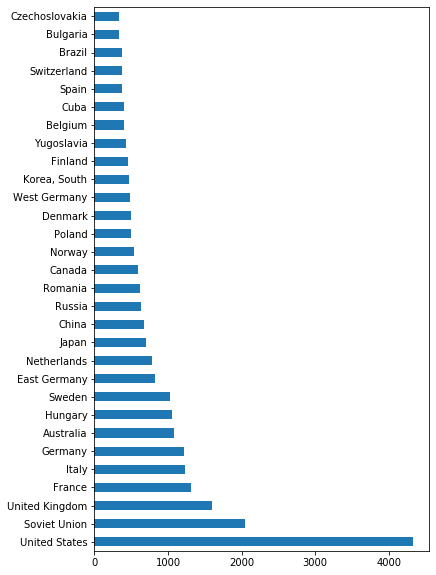

In [5]:
data['Country'].value_counts().head(30).plot(kind='barh', figsize = (6,10))

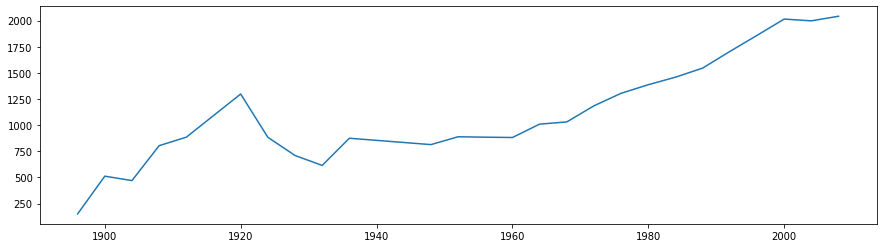

In [6]:
plt.figure(figsize=(15,4))
plt.plot(data['Year'].value_counts().sort_index())

In [7]:
summary = (
data
.groupby('Country')
.filter(lambda x: len(x)>500)
.groupby(['Country','Year'])
.size()
.to_frame('medal count')
.reset_index()
)

summary['Country'] = summary['Country'].str.replace(' ', '\n')
summary

,Country,Year,medal count
0,Australia,1896,2
1,Australia,1900,5
2,Australia,1920,6
3,Australia,1924,10
4,Australia,1928,4
...,...,...,...
309,United\nStates,1992,224
310,United\nStates,1996,260
311,United\nStates,2000,248
312,United\nStates,2004,264


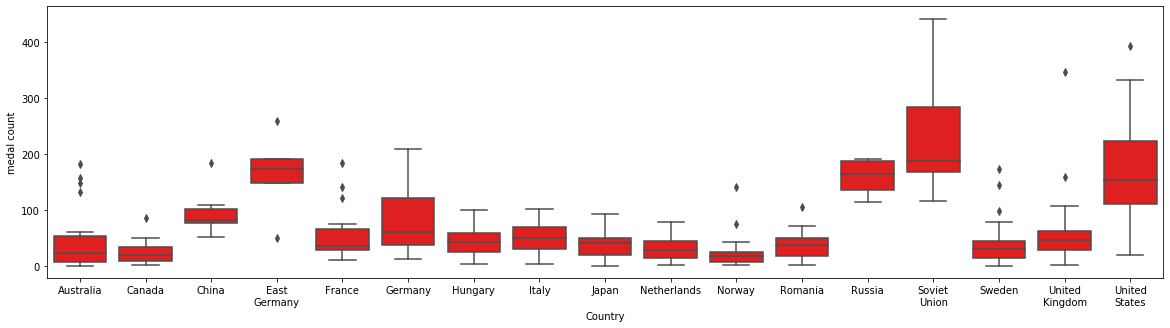

In [10]:
plt.figure(figsize=(20,5))
sns.boxplot(
data = summary,
x='Country',
y= 'medal count',
color='red')

In [11]:
summary_by_medal = (
data
.groupby('Country')
.filter(lambda x : len(x)>500)
.groupby(['Country', 'Year', 'Medal'])
.size()
.to_frame('medal count')
.reset_index()
)

summary_by_medal['Country']= summary_by_medal['Country'].str.replace(' ', '\n')
summary_by_medal

,Country,Year,Medal,medal count
0,Australia,1896,Gold,2
1,Australia,1900,Bronze,3
2,Australia,1900,Gold,2
3,Australia,1920,Bronze,1
4,Australia,1920,Silver,5
...,...,...,...,...
881,United\nStates,2004,Gold,116
882,United\nStates,2004,Silver,75
883,United\nStates,2008,Bronze,81
884,United\nStates,2008,Gold,125


<Figure size 1440x360 with 0 Axes>

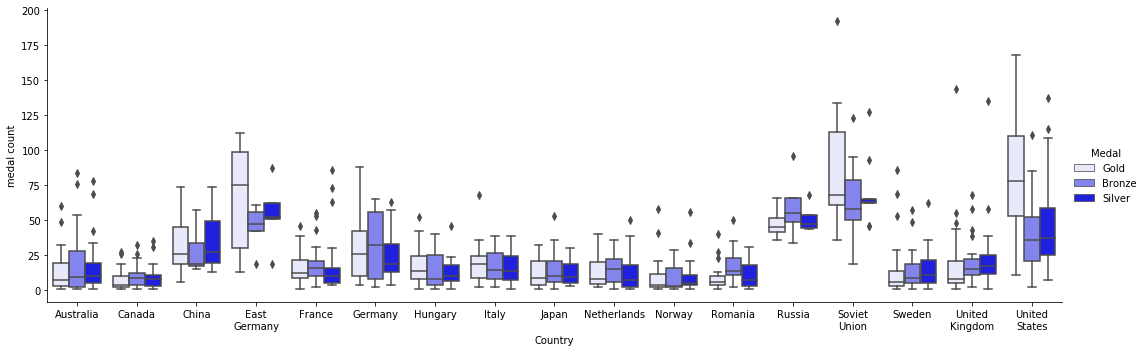

In [18]:
plt.figure(figsize=(20,5))
sns.catplot(
data = summary_by_medal,
x='Country',
y='medal count',
hue='Medal',
kind='box',
height=5,
aspect=3,
color='blue')

plt.savefig('Medals.svg')

<Figure size 432x288 with 0 Axes>